In [1]:
import os
import requests
import pandas as pd
from dotenv import load_dotenv

from langchain.chat_models import ChatOpenAI
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent


# .env 読み込み
print(r"..\environment\.env")
load_dotenv(dotenv_path=r'..\environment/.env',override=True)

# =========================
# 🔐 Metabase 認証・データ取得
# =========================

login_url = "https://metabase.tr-com.net/api/session"
username = os.getenv("MB_USERNAME", "").strip()
password = os.getenv("MB_PASSWORD", "").strip()

if not username or not password:
    raise ValueError("❌ MB_USERNAME または MB_PASSWORD が設定されていません")

print(f"ログイン試行中 → username: '{username}'")

response = requests.post(login_url, json={"username": username, "password": password})
if response.status_code == 200:
    session_id = response.json().get("id")
    print("✅ ログイン成功")
else:
    raise Exception(f"❌ ログイン失敗: {response.status_code}, {response.text}")


..\environment\.env
ログイン試行中 → username: 'y-nitta@torishima.co.jp'
✅ ログイン成功


In [2]:

# データ取得
url = "https://metabase.tr-com.net/api/card/2070/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}


In [3]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        dfori = pd.DataFrame(data)
        if dfori.empty:
            raise ValueError("❌ 取得したデータが空です。Metabaseを確認してください。")
        print("✅ データ取得成功")
        print(dfori.head())

    except Exception as e:
        raise Exception(f"❌ データ取得・DataFrame変換失敗: {e}")
else:
    raise Exception(f"❌ データ取得失敗: {response.status_code}, {response.text}")


✅ データ取得成功
   SensorId                               AssetId SensorType Orientation
0  EC10017B  e7877c64-7407-4375-ad20-206b5d0f89c2          M           2
1  EC1001B2  04fa37c4-89f8-4e46-a2dc-37c6b0c53c76          M           2
2  EC1003CA  867c50e0-9b92-43e1-ab1c-bc784040ea28          M           2
3  EC1003CE  d672d87c-055f-4c06-85fa-b2a502d6d8f5          M           2
4  EC1003E0  a8eae6a7-ecdb-4959-9d8b-50db3619e680          M           2


In [4]:

# データ取得
url = "https://metabase.tr-com.net/api/card/2071/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id
}


In [5]:

response = requests.post(url, headers=headers)
if response.status_code == 200:
    try:
        data = response.json()
        dfpump = pd.DataFrame(data)
        if dfpump.empty:
            raise ValueError("❌ 取得したデータが空です。Metabaseを確認してください。")
        print("✅ データ取得成功")
        print(dfpump.head())

    except Exception as e:
        raise Exception(f"❌ データ取得・DataFrame変換失敗: {e}")
else:
    raise Exception(f"❌ データ取得失敗: {response.status_code}, {response.text}")


✅ データ取得成功
                                AssetId      Model  ModelCode
0  000c617f-2bdf-4e56-87b1-659f90586ad0  CAL32-125          7
1  00b9e08c-72af-4edc-8471-464e30fdb7d3        CDM          5
2  00bbdac6-ab6a-446f-9541-ee9bb2ffb28d  MMTV200/5          2
3  00c79c40-1525-44cb-bc22-ba387c0f46c5    MMO65/7          8
4  00d079ed-e148-4553-a200-30a981b4d3c2    MMO65/7          8


In [6]:
dfori

,SensorId,AssetId,SensorType,Orientation
0,EC10017B,e7877c64-7407-4375-ad20-206b5d0f89c2,M,2
1,EC1001B2,04fa37c4-89f8-4e46-a2dc-37c6b0c53c76,M,2
2,EC1003CA,867c50e0-9b92-43e1-ab1c-bc784040ea28,M,2
3,EC1003CE,d672d87c-055f-4c06-85fa-b2a502d6d8f5,M,2
4,EC1003E0,a8eae6a7-ecdb-4959-9d8b-50db3619e680,M,2
...,...,...,...,...
2747,XVXP1VB2BEAA71343EA01D6D5F,1acb71e4-2707-44b2-9c76-8ae9cc694fab,M,2
2748,XVXP1VB3AA6C81348D11528858,c2e45286-866a-4512-b8cf-fd8c6355d85c,M,2
2749,XVXP1VB3C0DC613465B457BA21,ec87341b-4bf4-4da2-b918-fd0e49f452d8,M,2
2750,XVXP1VB9E6D4B13465B4233240,fb087902-62aa-411a-ae6d-6fb9cd852edc,M,2


In [7]:

dfori = dfori.drop_duplicates(subset='AssetId', keep='first')
dfori 


,SensorId,AssetId,SensorType,Orientation
0,EC10017B,e7877c64-7407-4375-ad20-206b5d0f89c2,M,2
1,EC1001B2,04fa37c4-89f8-4e46-a2dc-37c6b0c53c76,M,2
2,EC1003CA,867c50e0-9b92-43e1-ab1c-bc784040ea28,M,2
3,EC1003CE,d672d87c-055f-4c06-85fa-b2a502d6d8f5,M,2
4,EC1003E0,a8eae6a7-ecdb-4959-9d8b-50db3619e680,M,2
...,...,...,...,...
2721,XVVC003261134B298CC805,796c2cb8-f1a7-4ef5-9303-e4eec21336ce,M,1
2722,XVVC00327A134B2985A1833,f191d481-37d7-4a90-adce-6c3e5a43c9a2,M,1
2743,XVVC00433B134D88BE4553,14e9a7cf-61c1-46bd-bf34-258f0c7327e5,M,2
2744,XVVC00434D134D95231AA80,6561f9d9-0ec5-407e-8e3d-3c3c560be47a,M,2


In [8]:
dfori[dfori['AssetId'].duplicated(keep=False)]

,SensorId,AssetId,SensorType,Orientation


In [9]:
dfpump

,AssetId,Model,ModelCode
0,000c617f-2bdf-4e56-87b1-659f90586ad0,CAL32-125,7
1,00b9e08c-72af-4edc-8471-464e30fdb7d3,CDM,5
2,00bbdac6-ab6a-446f-9541-ee9bb2ffb28d,MMTV200/5,2
3,00c79c40-1525-44cb-bc22-ba387c0f46c5,MMO65/7,8
4,00d079ed-e148-4553-a200-30a981b4d3c2,MMO65/7,8
...,...,...,...
1480,ff93115d-beb3-4606-a7c4-72d60ff85c99,CDM350X300HN,5
1481,ff97c942-8eb3-47ec-89a5-e333614e36e6,CAL32-125,7
1482,ffa63aa5-8536-45c9-a38f-45f6daba94da,CDM700x600,5
1483,ffecef2d-70a2-44b3-9089-c54455d4943d,MHG4/6,3


In [10]:
dfpump[dfpump['AssetId'].duplicated(keep=False)]

,AssetId,Model,ModelCode


In [11]:

merged_df = pd.merge(dfpump, dfori, on='AssetId', how='inner')
print("マージ後件数:", len(merged_df))


マージ後件数: 213


In [12]:
merged_df

,AssetId,Model,ModelCode,SensorId,SensorType,Orientation
0,00bbdac6-ab6a-446f-9541-ee9bb2ffb28d,MMTV200/5,2,VB39B0E8,M,2
1,02a41c06-b19b-4a11-b505-3f9fd52e184a,MHD40/11E,1,VB9E7FA8,M,2
2,02bab784-8b07-4391-83a7-22fd6dfe05c9,CDM600X500KBA,5,VB89B403,M,2
3,030a1b28-d3dc-46a2-802b-30b8d87359e7,MHG5/11A,3,VC000F1E,M,2
4,03b12cb6-df67-40a1-928e-91ae6149d84d,CAM150-400,7,VB35DCB6,M,2
...,...,...,...,...,...,...
208,fe84ff53-4a3c-4dbd-9348-b330d5e172ee,MML40/6,9,VB6C5EB4,M,2
209,fe91b482-3e69-4177-b210-d909a2ffe185,CAR50-200,7,VBC353F0,M,2
210,ff7a14f4-c0ce-4e0d-81f7-e3ddd0a0c90a,MHG2/9,3,VB3A4993,M,2
211,ff8b6f63-1b9d-4db5-a08a-ef07c8110f0b,CAL200-250,7,VB8B4B10,M,2


In [13]:
merged_df[merged_df['SensorId'].duplicated(keep=False)]

,AssetId,Model,ModelCode,SensorId,SensorType,Orientation


In [14]:
import requests
import pandas as pd

# SensorId 一覧（重複なし前提）
sensor_ids = merged_df['SensorId'].dropna().tolist()

# Metabase API 情報
url = "https://metabase.tr-com.net/api/card/2072/query/json"
headers = {
    "Content-Type": "application/json",
    "X-Metabase-Session": session_id  # ※事前取得
}

# データ格納
results = []

# API ループ
for sid in sensor_ids:
    payload = {
        "parameters": [
            {
                "type": "category",
                "target": ["variable", ["template-tag", "sensorid"]],
                "value": sid
            }
        ]
    }

    response = requests.post(url, headers=headers, json=payload)

    if response.status_code == 200:
        try:
            data = response.json()
            df = pd.DataFrame(data)
            if not df.empty:
                df["sensorid"] = sid  # sensorid 列として追加（小文字）
                results.append(df)
                print(f"✅ SensorId={sid}：取得成功")
            else:
                print(f"⚠️ SensorId={sid}：データなし")
        except Exception as e:
            print(f"❌ SensorId={sid}：JSON変換失敗 - {e}")
    else:
        print(f"❌ SensorId={sid}：リクエスト失敗 - {response.status_code}, {response.text}")

# 統合・整形
if results:
    dffft_all = pd.concat(results, ignore_index=True)

    # sensorid をキーに merged_df から Model + ModelCode を追加
    df_model = merged_df[['SensorId', 'ModelCode', 'Model']].rename(columns={'SensorId': 'sensorid'})
    final_df = pd.merge(dffft_all, df_model, on='sensorid', how='left')

    # 必要な列だけ抽出・並び替え
    final_df = final_df[['sensorid', 'ModelCode', 'Model', 'fftrecord_date', 'fftdatax']]


    # 結果の確認
    print("✅ 最終データフレーム作成完了")
    print(final_df.head())
else:
    raise ValueError("❌ 有効なデータが1件も取得できませんでした。")


✅ SensorId=VB39B0E8：取得成功
✅ SensorId=VB9E7FA8：取得成功
✅ SensorId=VB89B403：取得成功
✅ SensorId=VC000F1E：取得成功
✅ SensorId=VB35DCB6：取得成功
✅ SensorId=VB68F135：取得成功
✅ SensorId=VB3793A7：取得成功
✅ SensorId=VB393DC5：取得成功
✅ SensorId=VC000F2D：取得成功
✅ SensorId=VB2B314F：取得成功
⚠️ SensorId=XVVB36C1BC134893D4E883：データなし
✅ SensorId=VB0FC749：取得成功
✅ SensorId=VB686BD8：取得成功
✅ SensorId=VB68B648：取得成功
✅ SensorId=VBA2ACA6：取得成功
✅ SensorId=VC000EC4：取得成功
✅ SensorId=VB6C5E92：取得成功
✅ SensorId=VB28C465：取得成功
⚠️ SensorId=XVVB3754841343F0152A056：データなし
✅ SensorId=VB681364：取得成功
✅ SensorId=VB3B101D：取得成功
✅ SensorId=VB26E44B：取得成功
✅ SensorId=VB358750：取得成功
✅ SensorId=VB37A672：取得成功
⚠️ SensorId=XVVBC0671B134D6F462960：データなし
✅ SensorId=VB6B6710：取得成功
✅ SensorId=VBA0AE7F：取得成功
✅ SensorId=VB69D129：取得成功
✅ SensorId=VC000682：取得成功
✅ SensorId=VB6889E1：取得成功
⚠️ SensorId=XVVB9E4CF9134893D52B0B：データなし
✅ SensorId=VB0FC36E：取得成功
✅ SensorId=VB6D8DD6：取得成功
✅ SensorId=VBA4BA4A：取得成功
✅ SensorId=VB3938CA：取得成功
✅ SensorId=VB6B063B：取得成功
✅ SensorId=VB8895DE：取得成功
✅ SensorId

In [15]:
# CSVとして保存（文字化け防止にUTF-8 BOM付き）
final_df.to_csv("fft_model_data.csv", index=False, encoding='utf-8-sig')


In [16]:
print(final_df.shape)
print(final_df)


(28103, 5)
       sensorid  ModelCode       Model       fftrecord_date  \
0      VB39B0E8          2   MMTV200/5  2020-04-23T19:14:29   
1      VB39B0E8          2   MMTV200/5  2020-06-23T11:53:55   
2      VB39B0E8          2   MMTV200/5  2020-06-30T11:53:54   
3      VB39B0E8          2   MMTV200/5  2020-07-01T11:53:19   
4      VB39B0E8          2   MMTV200/5  2020-07-08T11:53:19   
...         ...        ...         ...                  ...   
28098  VB8BC173          5  CDM700x600  2022-05-09T05:46:12   
28099  VB8BC173          5  CDM700x600  2022-05-30T05:45:06   
28100  VB8BC173          5  CDM700x600  2022-06-06T05:43:47   
28101  VB8BC173          5  CDM700x600  2022-06-20T05:42:50   
28102  VB8BC173          5  CDM700x600  2022-07-04T05:42:08   

                                                fftdatax  
0      0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...  
1      0,0.01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.02,0.02...  
2      0.03,0.01,0.01,0,0,0,0,0,0,0.01,0,0.01,0.02,0...

In [17]:
# 件数をカウントして表示（降順）
print(final_df['ModelCode'].value_counts().sort_index())


ModelCode
1      693
2      479
3     1536
4      141
5     2621
7    20726
8      252
9     1655
Name: count, dtype: int64


C:\Users\H6445\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12372 (\N{HIRAGANA LETTER GO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\H6445\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12392 (\N{HIRAGANA LETTER TO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\H6445\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\H6445\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\H6445\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

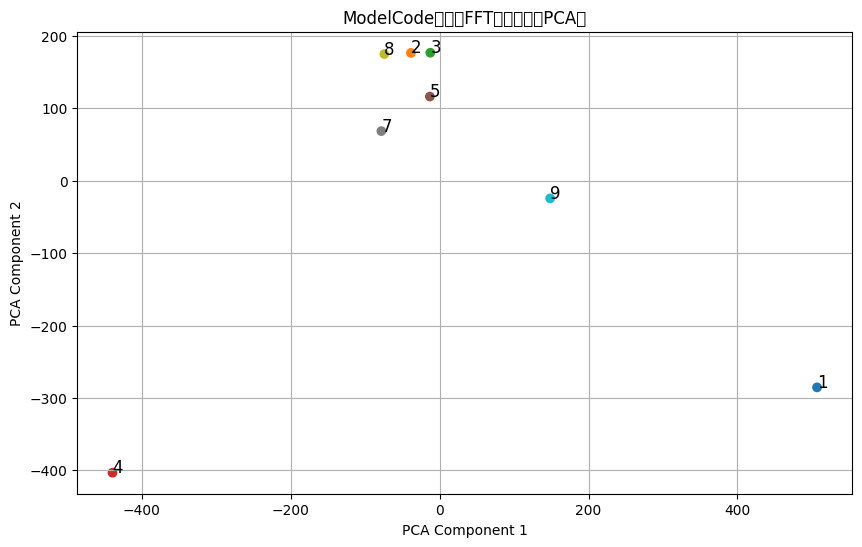

cluster       0  1  2     3   4  5     6      7  8    9
ModelCode                                              
1             0  2  1   136   3  2   182    350  1   16
2            20  0  0    54   0  0    39    366  0    0
3           118  0  0   112   3  0    83   1198  0   22
4            32  0  0     0   0  0   109      0  0    0
5           289  0  0   226  13  0   291   1760  0   42
7          4598  0  0  2168   0  0  2894  10217  0  849
8             0  0  0     0   0  0    31    221  0    0
9            90  0  1   162  19  2   305   1013  0   63


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# === 1. fftdataxの文字列を数値配列へ変換 ===
final_df["fftdata_array"] = final_df["fftdatax"].apply(
    lambda x: np.array(list(map(float, x.split(","))))
)

# === 2. 特徴量の抽出関数 ===
from scipy.signal import find_peaks

def extract_features(fft_array):
    peaks, _ = find_peaks(fft_array, height=0.01, distance=10, prominence=0.005)
    return {
        "mean": np.mean(fft_array),
        "std": np.std(fft_array),
        "max": np.max(fft_array),
        "energy": np.sum(fft_array ** 2),
        "num_peaks": len(peaks)
    }


# === 3. 各fftdataxに対して特徴量を計算 ===
features_df = pd.DataFrame(final_df["fftdata_array"].apply(extract_features).tolist())
final_df = pd.concat([final_df, features_df], axis=1)

# === 4. ModelCodeごとの平均特徴量を算出 ===
grouped = final_df.groupby("ModelCode")[["mean", "std", "max", "energy", "num_peaks"]].mean()

# === 5. PCAによる次元削減 ===
pca = PCA(n_components=2)
pca_result = pca.fit_transform(grouped)

# === 6. PCAプロット ===
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=grouped.index, cmap="tab10")
for i, label in enumerate(grouped.index):
    plt.annotate(str(label), (pca_result[i, 0], pca_result[i, 1]), fontsize=12)
plt.title("ModelCodeごとのFFT特徴分布（PCA）")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()

# === 7. KMeansクラスタリング（全データで分類）===
kmeans = KMeans(n_clusters=10, random_state=42)
final_df["cluster"] = kmeans.fit_predict(features_df)

# === 8. モデルコードとクラスタの関係を表示 ===
cluster_summary = pd.crosstab(final_df["ModelCode"], final_df["cluster"])
print(cluster_summary)


C:\Users\H6445\AppData\Local\Temp\ipykernel_15540\1730444605.py:38: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_15540\1730444605.py:38: UserWarning: Glyph 29305 (\N{CJK UNIFIED IDEOGRAPH-7279}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_15540\1730444605.py:38: UserWarning: Glyph 24500 (\N{CJK UNIFIED IDEOGRAPH-5FB4}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_15540\1730444605.py:38: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:\Users\H6445\AppData\Local\Temp\ipykernel_15540\1730444605.py:38: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.96])
C:

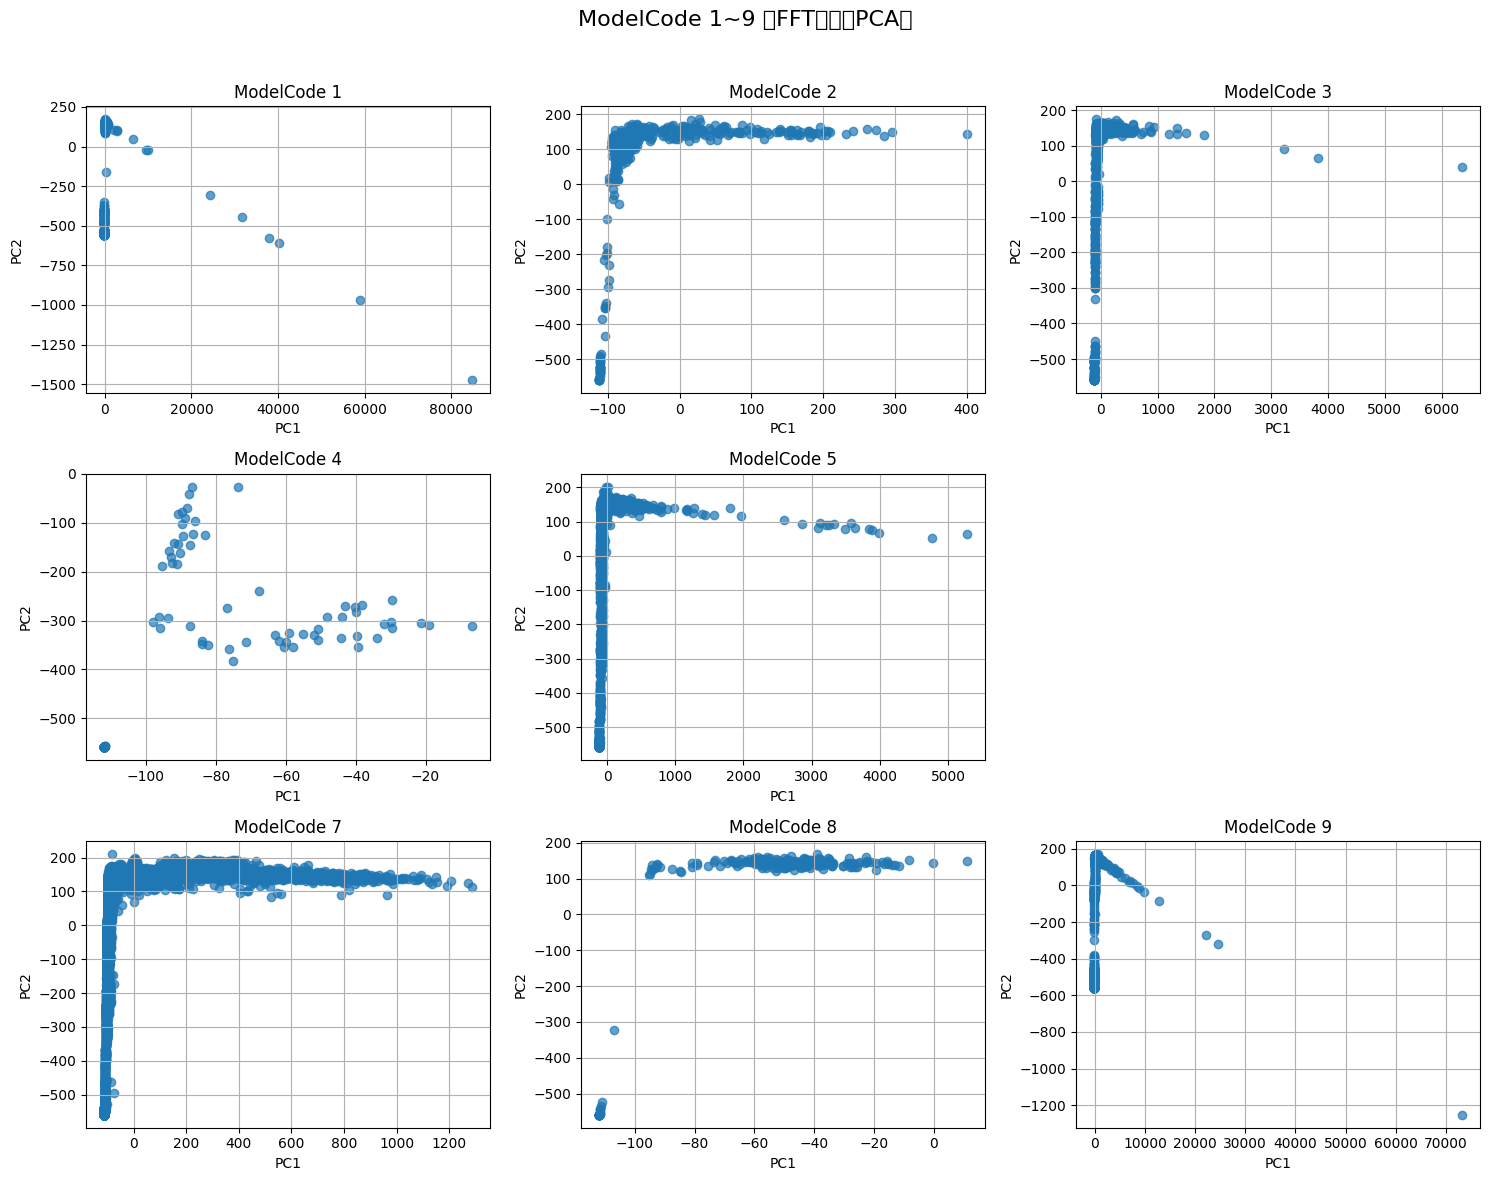

In [19]:
import matplotlib.pyplot as plt

# === PCA後のDataFrame（再掲） ===
# ModelCode 1〜9 の対象をフィルタ
mask_model_1_to_9 = final_df["ModelCode"].isin(range(1, 10))
features_subset = features_df[mask_model_1_to_9]
modelcode_subset = final_df.loc[mask_model_1_to_9, "ModelCode"]

# PCA実行
pca = PCA(n_components=2)
pca_result_subset = pca.fit_transform(features_subset)

# DataFrameに変換
pca_df = pd.DataFrame(pca_result_subset, columns=["PC1", "PC2"])
pca_df["ModelCode"] = modelcode_subset.values

# === 3×3 グリッドプロット（空の枠も処理） ===
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
fig.suptitle("ModelCode 1~9 のFFT特徴（PCA）", fontsize=16)

unique_codes = sorted(pca_df["ModelCode"].unique())

# プロット対象のコード分だけ描画
for idx, code in enumerate(range(1, 10)):
    ax = axes[idx // 3, idx % 3]
    subset = pca_df[pca_df["ModelCode"] == code]
    
    if not subset.empty:
        ax.scatter(subset["PC1"], subset["PC2"], alpha=0.7, color='C0')
        ax.set_title(f"ModelCode {code}")
        ax.set_xlabel("PC1")
        ax.set_ylabel("PC2")
        ax.grid(True)
    else:
        # データがない場合は非表示
        ax.axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [20]:
df_CDM = df[df.iloc[:, 1] == 'CDM']

df2 = df_CDM.iloc[:, 3].str.split(",", expand=True)#FFTをdfに
df2[9999] = df2[9999].str.replace("\r", "")
df2 = df2.apply(pd.to_numeric, errors="coerce")

df3 = df2.iloc[:, :1000]#1000Hzまで
df3.columns = [f"{i}Hz" for i in range(1, 1001)]
df3.index = pd.to_datetime(df_CDM["fftrecord_date"]).dt.date

# # ランダムに抽出
# df4 = df3.sample(n=20, random_state=42)
# df4 = df4.sort_index()


IndexError: single positional indexer is out-of-bounds

In [ ]:
df2


,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.01,0.01,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,...,0.02,0.00,0.01,0.01,0.02,0.01,0.01,0.02,0.01,0.01
1,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.04,0.02,0.02,0.05,0.04,0.03,0.05,0.04,0.02
2,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,...,0.02,0.03,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.03
3,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.00,0.02,0.03,0.02,0.00,0.01,0.01,0.01
4,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.02,0.01,0.03,0.02,0.03,0.03,0.02,0.02,0.01
5,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.05,0.05,0.05,0.04,0.04,0.05,0.04,0.03,0.04
6,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.01,0.01,0.03,0.03,0.01,0.02,0.01,0.00,0.02,0.03
7,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.03,0.00,0.03,0.02,0.01,0.02,0.01,0.00,0.00,0.01
8,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.00,...,0.04,0.01,0.00,0.01,0.00,0.03,0.03,0.02,0.01,0.02
9,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,...,0.02,0.02,0.02,0.02,0.03,0.03,0.02,0.02,0.02,0.03
